* It's a good material if you want apply pca in images
 >> **NOTE :** Here we applied PCA on `olivetti_faces` that is available on sklearn

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [2]:
oli = fetch_olivetti_faces()

In [3]:
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oli["data"].shape

(400, 4096)

In [6]:
oli["images"].shape

(400, 64, 64)

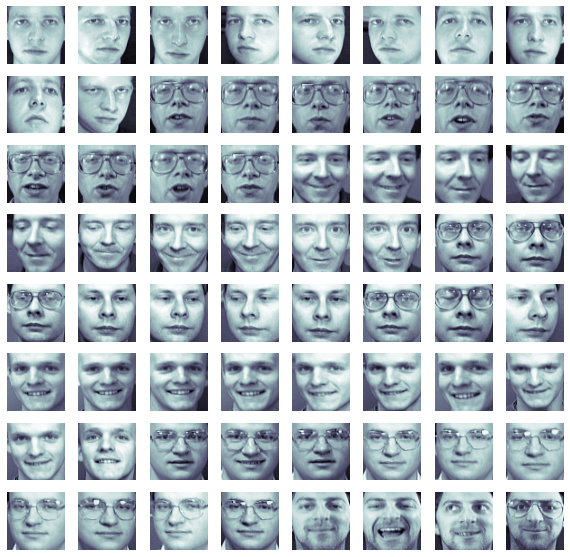

In [7]:
fig = plt.figure(figsize=(10,10))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)## That means I have 8 rows and 8 cols and putting the image one i+1 th pos
    ## within the subplots we will be plotting images
    ax.imshow(oli.images[i],cmap= plt.cm.bone)
    plt.axis("off")

In [8]:
## using pca
X = oli.data
Y = oli.target

In [9]:
pca = PCA()
pca.fit(X)

PCA()

In [10]:
pca.components_.shape

(400, 4096)

In [11]:
i = 0;
total = 0
total_var = sum(pca.explained_variance_)
while (total/total_var)< 0.95:
    total+= pca.explained_variance_[i]
    i = i+ 1

In [12]:
i,total,sum(pca.explained_variance_)

(123, 75.1929679736495, 79.11807480405999)

In [15]:
pca = PCA(n_components = i,whiten =True)
transformed_data = pca.fit_transform(X)

In [16]:
transformed_data.shape

(400, 123)

In [17]:
x_approx =pca.inverse_transform(transformed_data)

In [18]:
x_approx.shape

(400, 4096)

In [19]:
X_approx_images = x_approx.reshape((400, 64, 64))

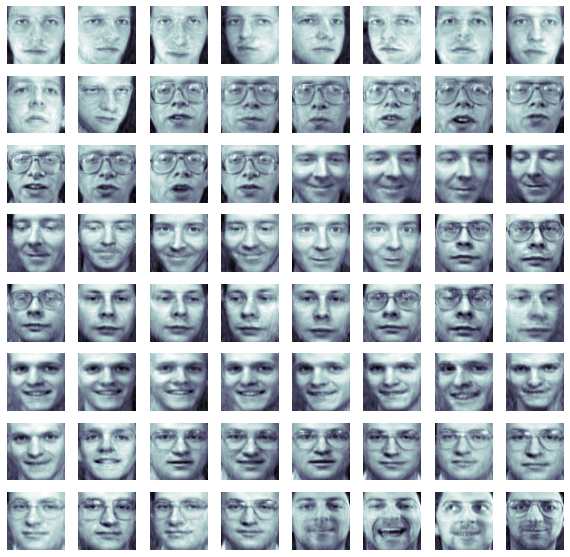

In [20]:
fig = plt.figure(figsize=(10,10))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)## That means I have 8 rows and 8 cols and putting the image one i+1 th pos
    ## within the subplots we will be plotting images
    ax.imshow(X_approx_images[i],cmap= plt.cm.bone)
    plt.axis("off")

In [21]:
## seeing a random array
arr = np.random.rand(64,64)

(-0.5, 63.5, 63.5, -0.5)

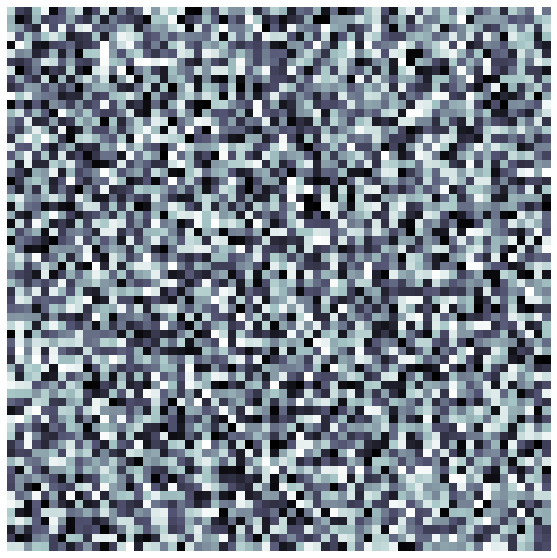

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.imshow(arr,cmap= plt.cm.bone)
plt.axis("off")

In [24]:
eigenvec = pca.components_

In [25]:
eigen_faces = eigenvec.reshape((123,64,64))

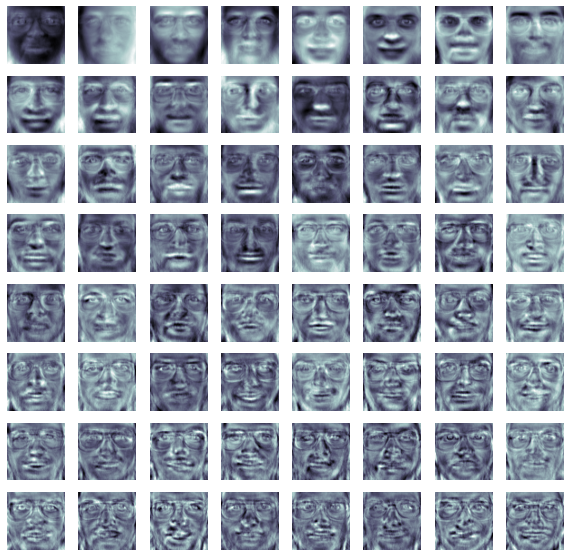

In [26]:
fig = plt.figure(figsize=(10,10))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)## That means I have 8 rows and 8 cols and putting the image one i+1 th pos
    ## within the subplots we will be plotting images
    ax.imshow(eigen_faces[i],cmap= plt.cm.bone)
    plt.axis("off")